# NLP Pipeline
We will learn some basic operations of the NLP pipeline with the help of NLTK, Hugging Face and spaCy. These will prove useful in your project for tasks such as preprocessing.

In [45]:
%pip install -q nltk matplotlib


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## NLTK
We will use [Chapter 3 of the introductory manual of NLTK](https://www.nltk.org/book/ch03.html) to solve the following exercises.

First, use the interactive downloader to get the *gutenberg* book corpus (in the *Corpora* tab). Take a moment to admire the amazing user interface.

In [46]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/joshua/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

NLTK automatically saves its files in the `nltk_data` folder in your home directory. (Windows users: Maybe it's in your `Documents`?)

We load the raw text of the first book in the corpus.

In [47]:
from nltk.corpus import gutenberg
raw_text = gutenberg.raw('austen-emma.txt')
print(len(raw_text))

887071


To use nltk's tokenization, we need to download the `punkt_tab` resource.

In [48]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/joshua/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Count the number of words and sentences in the book.

In [49]:
sentences = nltk.sent_tokenize(raw_text)
words = nltk.word_tokenize(raw_text)

print(sentences)
print(len(sentences))
print("\n")
print(words)
print(len(words))

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.', "Even before Miss Taylor had ceased to hold the nominal\noff

- Lowercase all words. 
- Count the number of unique lower-cased words in the book.

In [50]:
lower_words = [w.lower() for w in words]
print(lower_words)

unique_words = set(lower_words)
print(unique_words)

print("\n")

print("Tokens:", len(lower_words))
print("Types:", len(unique_words))
print("Type-token ratio:", len(set(words)) / ( len(words)))

['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an'

The total number of words is also called *tokens*, and the unique words are the *types*. (This is the same distinction as instance vs. class in software engineering.)

We now perform *stemming* on the first 50 words of the text. We use the PorterStemmer (example usage [here](https://www.nltk.org/howto/stem.html)). Plot only the pairs of words that have changed after stemming.

In [73]:
from nltk.stem import *

stemmer = PorterStemmer()

stems = [stemmer.stem(word) for word in unique_words]

changed = [word for word in stems if word not in unique_words]
print(stems)

for orig, stem in zip(stems, unique_words):
    print(orig, stem)

['vivac', '_well_', 'becam', 'oppos', 'unfortun', 'environ', 'instantli', 'waver', '_unrequited_', 'expect', 'boast', 'stray', 'yesterday', 'accept', 'border', 'respect', 'cotton', 'grammat', 'vexat', 'rapidli', 'suit', 'detail', 'care', 'enigma', 'reward', 'suitabl', 'channel', 'abus', 'vulgar', 'secreci', 'unsaid', "'s", 'deny.', 'acquaint', 'discreet', 'punctual', 'allow', 'compliment', 'none', 'pictur', 'briskli', 'endeavour', 'reveri', 'convincing.', 'rejoic', 'pilfer', ',', 'northward.', 'good-breed', 'interrupt', 'shock', 'gain', 'induc', 'broke', 'convers', 'rush', 'gladli', 'accord', 'rain', 'cautious', 'prefer', 'secresi', 'allevi', 'emin', 'charmed.', 'fame', 'grand-mama', 'honourable.', 'object', 'militari', 'spoil', 'fraud', 'river', 'front-door', 'marri', 'attribut', 'ten', 'wors', 'disturb', 'decid', 'prefer', 'desert', 'despair', 'carri', 'els', 'moment', 'accus', 'energi', 'twenty-f', 'happiest', 'clergyman', 'made', 'intim', 'contempl', 'reconcili', 'lie', 'indoor', '

Find the 10 most frequent words, together with their counts, using the `FreqDist` object from NLTK. Save it to a variable named `fdist`.

In [76]:
fdist_words = nltk.FreqDist(words).most_common(10)

fdist_changed = nltk.FreqDist(changed).most_common(10)

print(fdist_words)
print("\n")
print(fdist_changed)

[(',', 12016), ('.', 6355), ('to', 5125), ('the', 4844), ('and', 4653), ('of', 4272), ('I', 3177), ('--', 3100), ('a', 3001), ("''", 2452)]


[('observ', 9), ('admir', 8), ('desir', 7), ('engag', 6), ('encourag', 6), ('imagin', 6), ('commun', 6), ('fanci', 6), ('approv', 6), ('inclin', 6)]


In [77]:
fdist = nltk.FreqDist(words)

Run the below command to see the word counts vs. the words in the frequency distribution.

<Axes: xlabel='Samples', ylabel='Counts'>

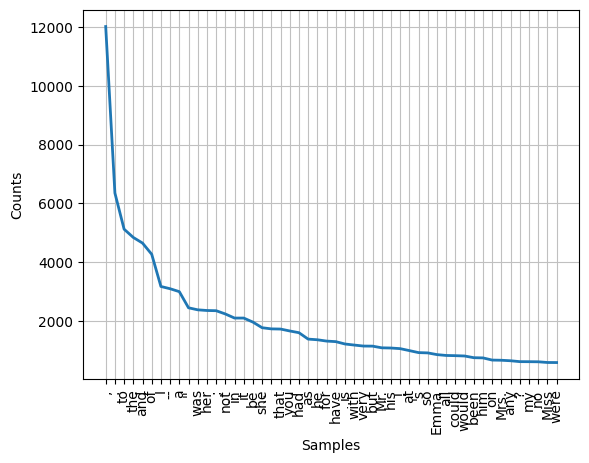

In [78]:
fdist.plot(50)

<Axes: xlabel='Samples', ylabel='Counts'>

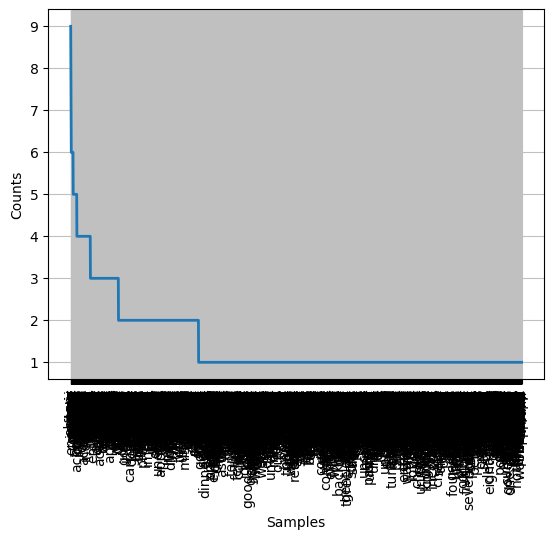

In [ ]:
fdist_changed = nltk.FreqDist(changed)
fdist_changed.plot()

This curve is characteristic of any natural (= human) language, and is known as [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). It states that the frequency of a word is inversely proportional to its rank, i.e.:
$$\text{frequency}(x) \propto \frac{1}{\text{rank}(x)}$$

## Hugging Face

With Transformers (we will get to know them in more detail later in the course), tokenization has become part of the model itself. As opposed to `word_tokenize` in NLTK, Transformers use BPE tokenization.

We first install Hugging Face's `transformers` library.

In [55]:
%pip install transformers ipywidgets ipykernel


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Use the [model page of the base-uncased version of BERT](https://huggingface.co/google-bert/bert-base-uncased) to initialize a `BertTokenizer`.

In [82]:
from transformers import BertTokenizer, AutoTokenizer, BertModel

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased') # alternative
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [57]:
model = BertModel.from_pretrained("bert-base-uncased")

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


We look at the first sentence of Jane Austen's Emma.

In [58]:
sentence = nltk.sent_tokenize(raw_text)[0].split('\n\n\n')[-1].replace('\n', ' ')
print(sentence)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.


Encode the sentence. Look at the outputs of the following functions:
- `tokenizer(sentence)`
- `tokenizer.encode(sentence)`
- `tokenizer.tokenize(sentence)`
- `tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))`

In [91]:
print(tokenizer(sentence))

{'input_ids': [101, 5616, 3536, 4580, 1010, 8502, 1010, 12266, 1010, 1998, 4138, 1010, 2007, 1037, 6625, 2188, 1998, 3407, 22137, 1010, 2790, 2000, 15908, 2070, 1997, 1996, 2190, 24618, 1997, 4598, 1025, 1998, 2018, 2973, 3053, 3174, 1011, 2028, 2086, 1999, 1996, 2088, 2007, 2200, 2210, 2000, 12893, 2030, 2310, 2595, 2014, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [83]:
tokens = tokenizer.encode(sentence)
tokens

[101,
 5616,
 3536,
 4580,
 1010,
 8502,
 1010,
 12266,
 1010,
 1998,
 4138,
 1010,
 2007,
 1037,
 6625,
 2188,
 1998,
 3407,
 22137,
 1010,
 2790,
 2000,
 15908,
 2070,
 1997,
 1996,
 2190,
 24618,
 1997,
 4598,
 1025,
 1998,
 2018,
 2973,
 3053,
 3174,
 1011,
 2028,
 2086,
 1999,
 1996,
 2088,
 2007,
 2200,
 2210,
 2000,
 12893,
 2030,
 2310,
 2595,
 2014,
 1012,
 102]

In [61]:
tokenizer.tokenize(sentence)

['emma',
 'wood',
 '##house',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 've',
 '##x',
 'her',
 '.']

In [62]:
encoded = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))
encoded

[5616,
 3536,
 4580,
 1010,
 8502,
 1010,
 12266,
 1010,
 1998,
 4138,
 1010,
 2007,
 1037,
 6625,
 2188,
 1998,
 3407,
 22137,
 1010,
 2790,
 2000,
 15908,
 2070,
 1997,
 1996,
 2190,
 24618,
 1997,
 4598,
 1025,
 1998,
 2018,
 2973,
 3053,
 3174,
 1011,
 2028,
 2086,
 1999,
 1996,
 2088,
 2007,
 2200,
 2210,
 2000,
 12893,
 2030,
 2310,
 2595,
 2014,
 1012]

# encoded vs tokens result
The difference is special tokens. Look at your notebook output:

- tokenizer.encode(sentence) returns 53 IDs: starts with 101 ([CLS]) and ends with 102 ([SEP])
- tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence)) returns 51 IDs: no [CLS]/[SEP]
The actual word IDs in the middle are identical. encode() automatically adds BERT's special tokens ([CLS] = 101 at the start, [SEP] = 102 at the end), while convert_tokens_to_ids() only converts the raw tokens you give it without adding anything extra.

You can verify: tokens[1:-1] == encoded — they match perfectly once you strip the special tokens.

**Decoding.** Check out the various ways of decoding: `.decode`, `.convert_ids_to_tokens`, `.convert_tokens_to_string`.

In [63]:
tokenizer.decode(encoded)

'emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.'

In [64]:
tokens = tokenizer.convert_ids_to_tokens(encoded)
tokens

['emma',
 'wood',
 '##house',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 've',
 '##x',
 'her',
 '.']

In [65]:
tokenizer.convert_tokens_to_string(tokens)

'emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.'

**Tokenization differences.** Compare the tokenization of NLTK, bert-base-uncased and [t5-small](https://huggingface.co/google-t5/t5-small).

In [66]:
from transformers import T5Tokenizer

t5_tokenizer = T5Tokenizer.from_pretrained("google-t5/t5-small")

print("NLTK:       ", nltk.word_tokenize(sentence))
print("BERT:       ", tokenizer.tokenize(sentence))
print("T5:         ", t5_tokenizer.tokenize(sentence))

NLTK:        ['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
BERT:        ['emma', 'wood', '##house', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 've', '##x', 'her', '.']
T5:          ['▁Emma', '▁Wood', 'house', ',', '▁handsome', ',', '▁clever', ',', '▁and', '▁rich', ',', '▁with', '▁', 'a', '▁comfortable', '▁home', '▁and', '▁happy', '▁dispositio

Now `encode` and `decode` the sentence with all 3 tokenizers. Is the encoding/decoding lossless, i.e. do we recover the original sentence?

In [67]:
# NLTK (no encode/decode, so we join tokens back)
nltk_tokens = nltk.word_tokenize(sentence)
nltk_decoded = ' '.join(nltk_tokens)
print("NLTK:    ", nltk_decoded)
print("Lossless:", nltk_decoded == sentence)
print()

# BERT
bert_encoded = tokenizer.encode(sentence)
bert_decoded = tokenizer.decode(bert_encoded, skip_special_tokens=True)
print("BERT:    ", bert_decoded)
print("Lossless:", bert_decoded == sentence)
print()

# T5
t5_encoded = t5_tokenizer.encode(sentence)
t5_decoded = t5_tokenizer.decode(t5_encoded, skip_special_tokens=True)
print("T5:      ", t5_decoded)
print("Lossless:", t5_decoded == sentence)


NLTK:     Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty-one years in the world with very little to distress or vex her .
Lossless: False

BERT:     emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.
Lossless: False

T5:       Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.
Lossless: True


## spaCy
We will use the [spaCy 101 guide](https://spacy.io/usage/spacy-101) to familiarize ourselves with its capabilities. First we install and download the small core model for English.

In [68]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

%pip install -q setuptools wheel
%pip install -q spacy
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (Caused by ResponseError('too many 502 error responses'))


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


*(You may have to restart your kernel after installing spacy.)*

We can now load the NLP pipeline from the small model.

In [103]:
import spacy
pipeline = spacy.load('en_core_web_sm')
doc = pipeline('Apple is looking at buying U.K. startup for $1 billion.')

The `doc` object has now tokenized our sentence and ran the NLP pipeline on it, as shown in this image:
![spacy pipeline](https://spacy.io/images/pipeline.svg)

Use the 101 guide to display the following information about each token.
- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple [UPOS](https://universaldependencies.org/u/pos/) part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalization, punctuation, digits.
- is stopword: Is the token part of a stop list, i.e. the most common words of the language?

In [104]:
print(doc)
print(doc.ents)

Apple is looking at buying U.K. startup for $1 billion.
(Apple, U.K., $1 billion)


In [105]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx False
is be AUX VBZ aux xx True
looking look VERB VBG ROOT xxxx False
at at ADP IN prep xx True
buying buy VERB VBG pcomp xxxx False
U.K. U.K. PROPN NNP nsubj X.X. False
startup startup VERB VBD ccomp xxxx False
for for ADP IN prep xxx True
$ $ SYM $ quantmod $ False
1 1 NUM CD compound d False
billion billion NUM CD pobj xxxx False
. . PUNCT . punct . False


Looking at the named entities in `doc`, print the following information:
- The token's text
- The start index of the named entity
- Its end index
- The NER label

In [106]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


**Question:** Search the internet for a description of the entity labels `FAC`, `ORG`, `GPE` and `LOC`.

**Answer:**
- FAC (Facility): Buildings, airports, highways, bridges, etc.
- ORG (Organization): Companies, agencies, institutions, etc.
- GPE (Geo-Political Entity): Countries, cities, states — political regions with a government.
- LOC (Location): Non-GPE locations — mountain ranges, bodies of water, regions, etc.

These come from the OntoNotes 5 annotation scheme that spaCy's NER model is trained on.